# Data Science Challenge

In [1]:
# If you'd like to install packages that aren't installed by default, uncomment the last two 
# lines of this cell and replace <package list> with a list of your packages.
# This will ensure your notebook has all the dependencies and works everywhere

#import sys
#!{sys.executable} -m pip install <package list>

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [3]:
#Libraries
import pandas as pd, numpy as np
pd.set_option("display.max_columns", 101)

## Data Description

Column | Description
:---|:---
`id` | Unique id
`Daily Time Spent on Site` | Consumer time spent on site (in minutes)
`Age` | Consumer age (in years)
`Area Income` | Avg. Income of geographical area of consumer (in US $$)
`Daily Internet Usage` | Avg. minutes a day consumer is on the internet
`Ad Topic Line` | Headline of the advertisement
`gender` | Gender of the consumer
`Country` | Country of consumer
`Timestamp` | Timestamp at which consumer clicked on Ad or closed window (YYYY-MM-DD HH:MM:SS)
`Clicked` | Whether a consumer clicked on the advert or not (0: No ,1: Yes)

## Data Wrangling & Visualization

In [4]:
# Dataset is already loaded below
data = pd.read_csv("train.csv")

In [5]:
data.head()

,id,Timestamp,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,gender,Country,Clicked
0,1200,2016-01-01 02:52:10,80.67,34,58909.36,239.76,Seamless impactful info-mediaries,0,Portugal,0
1,1201,2016-01-01 03:35:35,68.01,25,68357.96,188.32,Ameliorated actuating workforce,1,Afghanistan,0
2,1202,2016-01-01 05:31:22,80.94,36,60803.00,239.94,Self-enabling local strategy,0,Bermuda,0
3,1203,2016-01-01 08:27:06,78.77,28,63497.62,211.83,Public-key intangible Graphical User Interface,0,Guam,0
4,1204,2016-01-01 15:14:24,36.56,29,42838.29,195.89,Team-oriented bi-directional secured line,0,Uganda,1


In [6]:
#Explore columns
data.columns

Index(['id', 'Timestamp', 'Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'gender', 'Country',
       'Clicked'],
      dtype='object')

In [7]:
#Description
data.describe()

,id,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,gender,Clicked
count,1000.000000,1000.000000,1000.000000,775.000000,1000.000000,1000.000000,1000.000000
mean,1699.500000,65.120650,35.816000,55343.014555,179.592310,0.474000,0.503000
std,288.819436,15.781456,8.782669,13182.578667,43.735785,0.499573,0.500241
min,1200.000000,32.600000,19.000000,14548.060000,105.000000,0.000000,0.000000
25%,1449.750000,51.450000,29.000000,48270.620000,137.885000,0.000000,0.000000
50%,1699.500000,68.390000,35.000000,57737.510000,182.425000,0.000000,1.000000
75%,1949.250000,78.572500,41.250000,65207.185000,217.707500,1.000000,1.000000
max,2199.000000,91.370000,61.000000,79484.800000,269.960000,1.000000,1.000000


## Visualization, Modeling, Machine Learning

Predict which users might click a particular advertisement.
Please explain the findings effectively to technical and non-technical audiences using comments and visualizations, if appropriate.
- **Build an optimized model that effectively solves the business problem.**
- **The model's performance will be evaluated on the basis of accuracy.**
- **Read the test.csv file and prepare features for testing.**

In [8]:
#Loading Test data
test_data=pd.read_csv('test.csv')
test_data.head()

,id,Timestamp,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,gender,Country
0,2200,2016-06-04 17:24:07,43.88,54,31523.09,166.85,Enhanced methodical database,1,Somalia
1,2201,2016-06-05 00:29:13,66.40,40,77567.85,214.42,Digitized heuristic solution,0,Antigua and Barbuda
2,2202,2016-06-05 00:29:13,79.52,34,NaN,141.58,Customer-focused 24/7 concept,0,United States of America
3,2203,2016-06-05 07:54:30,52.35,25,33293.78,147.61,Mandatory 4thgeneration structure,1,Mali
4,2204,2016-06-05 07:54:30,81.51,36,NaN,195.93,Monitored local Internet solution,0,Croatia


In [9]:
#find if there's null values
print(data.isnull().sum(axis=0))
print(test_data.isnull().sum(axis=0))

id                            0
Timestamp                     0
Daily Time Spent on Site      0
Age                           0
Area Income                 225
Daily Internet Usage          0
Ad Topic Line                 0
gender                        0
Country                       0
Clicked                       0
dtype: int64
id                           0
Timestamp                    0
Daily Time Spent on Site     0
Age                          0
Area Income                 75
Daily Internet Usage         0
Ad Topic Line                0
gender                       0
Country                      0
dtype: int64


In [10]:
# -->only Area Income has null vals

In [11]:
#data structure
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
id                          1000 non-null int64
Timestamp                   1000 non-null object
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 775 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
gender                      1000 non-null int64
Country                     1000 non-null object
Clicked                     1000 non-null int64
dtypes: float64(3), int64(4), object(3)
memory usage: 78.2+ KB


In [12]:
# add weekday and hour features
data['Timestamp']=pd.to_datetime(data['Timestamp'])
data['Day']=data['Timestamp'].dt.weekday
data['Hour']=data['Timestamp'].dt.hour

# divide hour into 6 intervals
data['Interval']=data['Hour']%4

# fill in null values
data['Area Income'].fillna(-1, inplace=True)

#drop id (no need for label encoding) 
#and TimeStamp,Hour column (since we already have the newly-added Interval feature)
data=data.drop(columns=['id','Timestamp','Hour'])

data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,gender,Country,Clicked,Day,Interval
0,80.67,34,58909.36,239.76,Seamless impactful info-mediaries,0,Portugal,0,4,2
1,68.01,25,68357.96,188.32,Ameliorated actuating workforce,1,Afghanistan,0,4,3
2,80.94,36,60803.00,239.94,Self-enabling local strategy,0,Bermuda,0,4,1
3,78.77,28,63497.62,211.83,Public-key intangible Graphical User Interface,0,Guam,0,4,0
4,36.56,29,42838.29,195.89,Team-oriented bi-directional secured line,0,Uganda,1,4,3


In [13]:
#convert to object type from df
data=data.astype('object')

In [14]:
#doing the same for test set
# add weekday and hour features
test_data['Timestamp']=pd.to_datetime(test_data['Timestamp'])
test_data['Day']=test_data['Timestamp'].dt.weekday
test_data['Hour']=test_data['Timestamp'].dt.hour

# divide hour into 6 intervals
test_data['Interval']=test_data['Hour']%4

# fill in null values
test_data['Area Income'].fillna(-1, inplace=True)

#drop TimeStamp,Hour column
test_data=test_data.drop(columns=['Timestamp','Hour'])

test_data.head()

,id,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,gender,Country,Day,Interval
0,2200,43.88,54,31523.09,166.85,Enhanced methodical database,1,Somalia,5,1
1,2201,66.40,40,77567.85,214.42,Digitized heuristic solution,0,Antigua and Barbuda,6,0
2,2202,79.52,34,-1.00,141.58,Customer-focused 24/7 concept,0,United States of America,6,0
3,2203,52.35,25,33293.78,147.61,Mandatory 4thgeneration structure,1,Mali,6,3
4,2204,81.51,36,-1.00,195.93,Monitored local Internet solution,0,Croatia,6,3


In [15]:
#convert to object type from df
test_data=test_data.astype('object')

In [16]:
#Label encoding all features - normalize labels from non-numerical to numerical labels

#print(test_data.columns)

for col in test_data.columns[1:]:
    label=LabelEncoder()
    label.fit(list(data[col].values)+list(test_data[col].values))
    data[col]=label.transform(list(data[col].values))
    test_data[col]=label.transform(list(test_data[col].values))

data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,gender,Country,Clicked,Day,Interval
0,739,15,551,889,778,0,169,0,4,2
1,452,6,853,508,17,1,0,0,4,3
2,744,17,602,890,797,0,23,0,4,1
3,688,9,699,675,685,0,84,0,4,0
4,33,10,184,555,872,0,220,1,4,3


In [17]:
#convert click to float 
y=data['Clicked'].astype('float')
x=data.drop(columns=['Clicked'])

#split into random train and test sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=69)

In [18]:
#Gini Decision Tree
clf_gini=DecisionTreeClassifier()
clf_gini.fit(x_train,y_train)
predicted=clf_gini.predict(x_test)

#Conf. matrix and accuracy score
print(confusion_matrix(y_test,np.round(predicted)))
print(accuracy_score(y_test,np.round(predicted)))

[[41 11]
 [ 7 41]]
0.82


In [19]:
#Entropy Decision Tree
clf_ent=DecisionTreeClassifier(criterion='entropy')
clf_ent.fit(x_train,y_train)
predicted=clf_ent.predict(x_test)

#Conf. matrix and accuracy score
print(confusion_matrix(y_test,np.round(predicted)))
print(accuracy_score(y_test,np.round(predicted)))

[[40 12]
 [ 8 40]]
0.8


In [20]:
#Random Forest
rf=RandomForestClassifier(n_estimators=50,max_depth=12,random_state=69)
rf.fit(x_train,y_train)
predicted=rf.predict(x_test)

#Conf. matrix and accuracy score
print(confusion_matrix(y_test,np.round(predicted)))
print(accuracy_score(y_test,np.round(predicted)))

[[44  8]
 [ 7 41]]
0.85


In [21]:
#Naive Bayes for multinominal model
model=MultinomialNB().fit(x_train,y_train)
predicted=model.predict(x_test)

#Conf. matrix and accuracy score
print(confusion_matrix(y_test,np.round(predicted)))
print(accuracy_score(y_test,np.round(predicted)))

[[43  9]
 [12 36]]
0.79


In [22]:
#Gaussian Naive Bayes
model=GaussianNB().fit(x_train,y_train)
predicted=model.predict(x_test)

#Conf. matrix and accuracy score
print(confusion_matrix(y_test,np.round(predicted)))
print(accuracy_score(y_test,np.round(predicted)))

[[46  6]
 [ 9 39]]
0.85


In [23]:
#Naive Bayes for Bernoulli model
model=BernoulliNB().fit(x_train,y_train)
predicted=model.predict(x_test)

#Conf. matrix and accuracy score
print(confusion_matrix(y_test,np.round(predicted)))
print(accuracy_score(y_test,np.round(predicted)))

[[22 30]
 [12 36]]
0.58




**Describe the most important features in the model to a management audience.**

> #### Task:
- **Visualize the top 10 features and their feature importance.**


In [24]:
#moving Clicked to first-positioned column
first_pos=data.pop('Clicked')
data.insert(0,'Clicked',first_pos)

In [25]:
data.head()
# data.columns[0]
# data.columns[1:]

,Clicked,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,gender,Country,Day,Interval
0,0,739,15,551,889,778,0,169,4,2
1,0,452,6,853,508,17,1,0,4,3
2,0,744,17,602,890,797,0,23,4,1
3,0,688,9,699,675,685,0,84,4,0
4,1,33,10,184,555,872,0,220,4,3


In [26]:
#separating into target and independent var
# data.columns[1:]
tar=data.iloc[:,0]
tar=tar.astype('int')

ind=data.iloc[:,1:]
ind=ind.astype('int')

[0.26020394 0.1025843  0.15386215 0.2784467  0.05133928 0.01939411
 0.05137589 0.04712835 0.03566527]


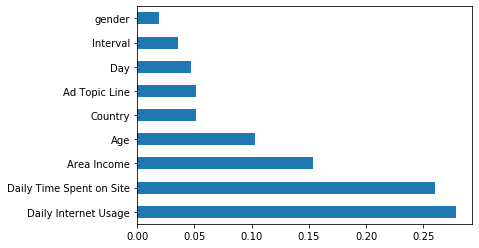

In [27]:
# Feature Importance Visualization
model=ExtraTreesClassifier(n_estimators=100)
model.fit(ind,tar)
print(model.feature_importances_)

#plotting
f_i=pd.Series(model.feature_importances_,index=ind.columns)
f_i.nlargest(10).plot(kind='barh')
plt.show()

In [28]:
#Daily Internet Usage is the most importance feature, 
#following very close by Daily Time Spent on Site.
#In other words, Time Spent Browsing in general plays an important role in the chance of 
#clicking an ad.

> #### Task:
- **Submit the predictions on the test dataset using your optimized model** <br/>
    For each record in the test set (`test.csv`), predict whether a consumer clicked on an ad or not. Submit a CSV file with a header row and one row per test entry. 
    
The file (`submissions.csv`) should have exactly 2 columns:
   - **id**
   - **Clicked**

In [29]:
#Among the 6 models, Random Forest and Gaussian Naive Bayes models have 
#the largest accuracy score of 85%, I'll pick either to be the optimized model 
#in this case Random Forest

In [30]:
#Start testing and storing to CSV
pred=rf.predict(test_data[test_data.columns[1:]])
submission_df=pd.DataFrame({'id':test_data['id'],'Clicked':pred})
submission_df["Clicked"]=submission_df["Clicked"].astype(int)

In [31]:
#Submission
submission_df.to_csv('submissions.csv',index=False)

---